# Utilising a Support Vector Machine (SVM) to Classify Breast Masses as Benign or Malignant

In this program we will use the SVM algorithm to make predictions on scikit-learn's breast cancer dataset. The dataset consists of 30 features used to diagnose a breast mass as either malignant or benign (label 0 for malignant and 1 for benign). Our aim will be to train an SVM classifier that delivers the best predicitions on the test set, and then determine which features are most important in predicting the diagnosis.

We begin by loading the dataset and transferring it to a dataframe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
cancer_data = datasets.load_breast_cancer()

X = cancer_data['data']
features = cancer_data['feature_names']
y = cancer_data['target']
df = pd.DataFrame(X)
df.columns = features
df['y'] = y

It is useful to view a part of the data and check data types and for any missing values. We will also generate some basic statistics.

In [2]:
# inspect dataframe
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [3]:
# check data type and for missing entries
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
# generate basic statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


From inspecting the dataframe we can see that the features vary by orders of magnitude. As SVM is sensitive to the scale of the features, it is important that we employ feature scaling before using the algorithm.

In [5]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 16)

We are going to utilise a cross-validated gridsearch to fine tune the $C$ hyperparameter, which is inversely proportional to the L2 regularisation parameter. When using soft-margin SVM classifiers it is important to use regularisation. Small values of $C$ result in severe penalties for misclassifications and complex hyperplanes, whereas very large values of $C$ allow significant misclassifications and lead to simple hyperplanes. Our goal is to identify the optimal value of $C$ for balancing maximum margin width with the number of misclassifications.

We will define a suitable scoring metric to use with GridSearchCV as the inbuilt scoring methods are not suited to SVM classifiers. Therefore, we will define a metric that minimises the number of misclassifications whilst simultaneously encouraging the model to keep the number of samples in the margin to a minimum. We utilise the confusion matrix to determine the number of misclassified samples, and decision_function to compute the number of samples that lie in the margin.

In [6]:
# Find the optimal C regularisation parameter
c_space = np.logspace(-2, 2, 50)
param_grid = {'C': c_space}

# define scoring metric for GridSearchCV
def scoring_metric(svc, X, y):
    # make test predictions
    y_pred = svc.predict(X)
    # produce confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    # get total classifications
    total = sum(sum(conf_mat))
    # correct classifications are the diagonal elements
    correct = conf_mat.trace()
    # identify misclassifications
    misclass = total - correct
    # create empty array to store points lying in the margin
    margin_points = np.array([])
    dec_func = svc.decision_function(X)
    # select the values of points lying on or in the margin
    points = dec_func[dec_func >= -1]
    points = points[points <= 1]
    # add margin points to empty array
    margin_points = np.append(margin_points, points)
    # count number of points lying in the collective margins
    no_of_points = len(margin_points)
    # add a weighting constant to determine the severity of penalising points in the margin
    C = 1
    # define metric so that it is larger for fewer numbers of misclassified points and for fewer points lying
    # in the margins
    metric = (1 - (misclass + C*no_of_points))/y.shape[0]
    return metric

Next we create the SVM classifier, perform the gridsearch on the training data and print out the identified optimal value of $C$.

In [7]:
# create SVM classifier
svc = SVC(kernel = 'linear')
# define GridSearchCV object
svc_cv = GridSearchCV(svc, param_grid, scoring = scoring_metric, cv = 5)
svc_cv.fit(X_train, y_train)
# assign estimator with paramaters chosen by the grid search
svc_optimal = svc_cv.best_estimator_
print('Optimal regularisation parameter C = {:.2f}'.format(svc_optimal.C))

Optimal regularisation parameter C = 68.66


We can compute the confusion matrix and classification report of the SVM classifier using this value of $C$.

In [8]:
# make predictions on test samples
y_pred = svc_optimal.predict(X_test)
# generate confusion matrix
print(confusion_matrix(y_test, y_pred))
# generate classification report
print(classification_report(y_test, y_pred))

[[39  2]
 [ 2 71]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.97      0.97      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



As we can see, the performance of our model on the test set is excellent. Finally, we will identify which features are most important to the classifier. The decision boundary hyperplane in SVM is defined by $\textbf{w}\cdot \textbf{x} + b = \sum\limits_{i}w_ix_i = 0$. The larger the coefficient $w_i$ is relative to the other coefficients, the closer the hyperplane is to being perpendicular to the axis of the feature $x_i$. If the hyperplane was perpendicular to the axis of a feature, the test sample classifications would be predicted solely on the value of that one feature. Therefore, larger coefficients indicate a greater importance of the corresponding feature to the model.

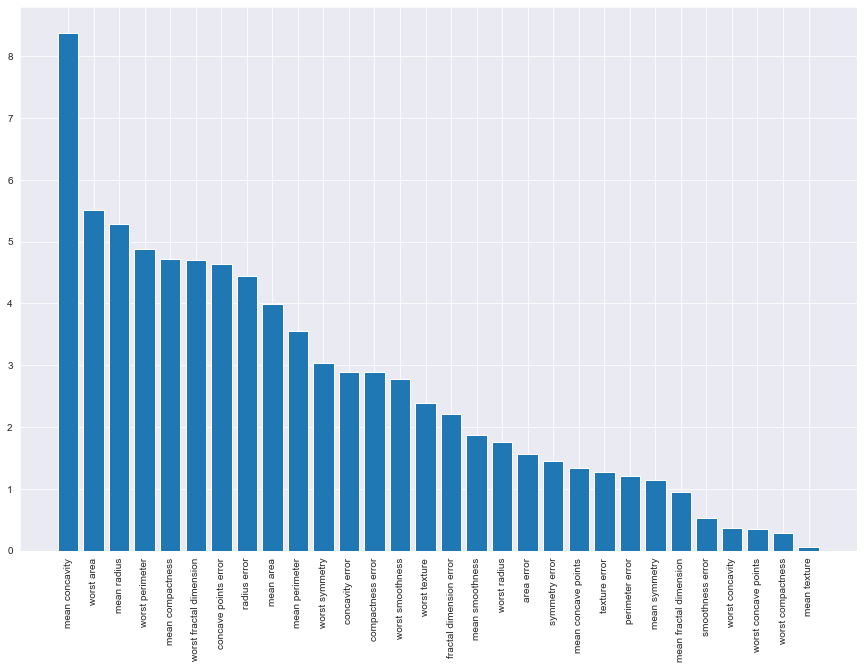

In [9]:
# get the model coefficients
coefs = svc_optimal.coef_
sns.set_style('darkgrid')
coefs = np.split(coefs, 1)
coefs = abs(coefs[0][0])
# zip(coefs, features) returns an iterator of tuples of the feature names and corresponding coefficients
# these tuples are sorted in descending order and then the coefficients and feature names are passed into 
# zip again to return an iterator of two tuples, the first containing all the coefficients and the second 
# all the feature names
coefs, features = zip(*sorted(zip(coefs, features), reverse = True))

# plot the coefficients as a barchart in ascending order
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)
ax.bar(range(len(coefs)), coefs, label = features)
ax.set_xticks(range(len(coefs)))
ax.set_xticklabels(features, rotation = 90)
plt.show()

For our SVM classifier mean concavity is the most important feature for determining whether the breast mass is benign or malignant.